In [45]:
# import libraries
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\DOANTR~1\AppData\Local\Temp/ipykernel_18508/11644061.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Import and process the data

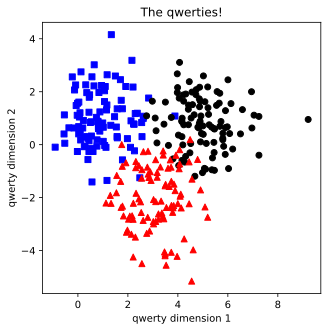

In [46]:
# Create data
n_per_clust = 100
blur = 1

A = [1, 1]
B = [5, 1]
C = [3, -2]

# Generate data
a = [A[0] + np.random.randn(n_per_clust) * blur, A[1] + np.random.randn(n_per_clust) * blur]
b = [B[0] + np.random.randn(n_per_clust) * blur, B[1] + np.random.randn(n_per_clust) * blur]
c = [C[0] + np.random.randn(n_per_clust) * blur, C[1] + np.random.randn(n_per_clust) * blur]

# Concatanate into a matrix
data_np = np.hstack(tup=(a, b, c)).T

# True labels
labels_np = np.vstack(tup=(np.zeros(shape=(n_per_clust, 1)), np.ones(shape=(n_per_clust, 1)), 1 + np.ones(shape=(n_per_clust, 1))))

# Convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

# Show the data
fig = plt.figure(figsize=(5, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1], 'ko')
plt.plot(data[np.where(labels == 2)[0], 0], data[np.where(labels == 2)[0], 1], 'r^')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

# Create the ANN model

In [47]:
# Model architecture
ANN_q = nn.Sequential(
  nn.Linear(in_features=2, out_features=4), # Input layer
  nn.ReLU(),                                # Activation unit
  nn.Linear(in_features=4, out_features=3), # Output unit
  nn.Softmax(dim=1)                         # Final activation unit
)

# Loss function
loss_func = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params=ANN_q.parameters(), lr=0.01)

# Test the model

In [48]:
y_hat = ANN_q(data)

print(data.shape)
print(y_hat.shape)
print(y_hat)

torch.Size([300, 2])
torch.Size([300, 3])
tensor([[0.2554, 0.4022, 0.3424],
        [0.1911, 0.4159, 0.3930],
        [0.2817, 0.3743, 0.3440],
        [0.2412, 0.4396, 0.3192],
        [0.1924, 0.4167, 0.3909],
        [0.2036, 0.4067, 0.3896],
        [0.2080, 0.4255, 0.3665],
        [0.2126, 0.4278, 0.3596],
        [0.2102, 0.4266, 0.3632],
        [0.2528, 0.3920, 0.3552],
        [0.1911, 0.4159, 0.3930],
        [0.1911, 0.4159, 0.3930],
        [0.2282, 0.4025, 0.3693],
        [0.2485, 0.4133, 0.3382],
        [0.2255, 0.4336, 0.3408],
        [0.2297, 0.4009, 0.3694],
        [0.1911, 0.4159, 0.3930],
        [0.1950, 0.4183, 0.3867],
        [0.2716, 0.3972, 0.3313],
        [0.2036, 0.4062, 0.3902],
        [0.1911, 0.4159, 0.3930],
        [0.2320, 0.4362, 0.3318],
        [0.2002, 0.4085, 0.3913],
        [0.2068, 0.4248, 0.3683],
        [0.1929, 0.4170, 0.3901],
        [0.1911, 0.4159, 0.3930],
        [0.1911, 0.4159, 0.3930],
        [0.2100, 0.4264, 0.3636],
      

# Train the model

In [49]:
num_epochs = 10000

# Initialize losses
losses = torch.zeros(num_epochs)
ongoing_acc = []

# Loop over epochs
for epoch_i in range(num_epochs):
  # Forward pass
  y_hat = ANN_q(data)

  # Compute loss
  loss = loss_func(y_hat, labels)
  losses[epoch_i] = loss

  # Backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Compute accuracy
  matches = torch.argmax(y_hat, axis=1) == labels   # Booleans (True/False)
  matches_numeric = matches.float()                 # Convert to numbers (0/1)
  accuracy_pct = 100 * torch.mean(matches_numeric)  # Average and *100
  ongoing_acc.append(accuracy_pct)                  # Add to list of accuracies

# Final forward pass
predictions = ANN_q(data)

pred_labels = torch.argmax(predictions, axis=1)     # Vector of the index of the largest value in each row (sample)
total_acc = 100 * torch.mean((pred_labels == labels).float())

print(total_acc)

tensor(94.6667)


# Visualize the results

Final Accuracy: 94.66999816894531%


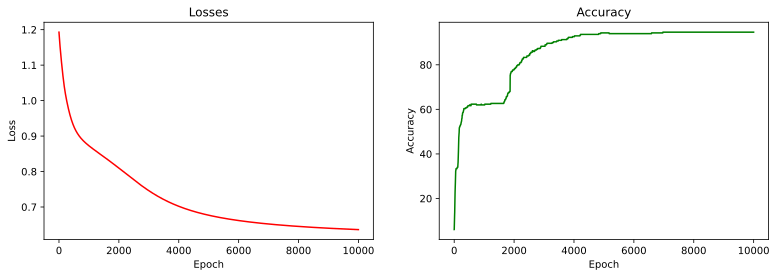

In [50]:
# Report accuracy
print(f'Final Accuracy: {np.round(total_acc, 2)}%')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

ax[0].plot(losses.detach(), 'r')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Losses')

ax[1].plot(ongoing_acc, 'g')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy')

plt.show()
# Run training again to see whether this performance is consistent

In [51]:
# Confirm that all model predictions sum to 1, but only when converted to softmax
sm = nn.Softmax(1)
print(torch.sum(y_hat, axis=1))
print(torch.sum(sm(y_hat), axis=1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

# Plot the raw model outputs

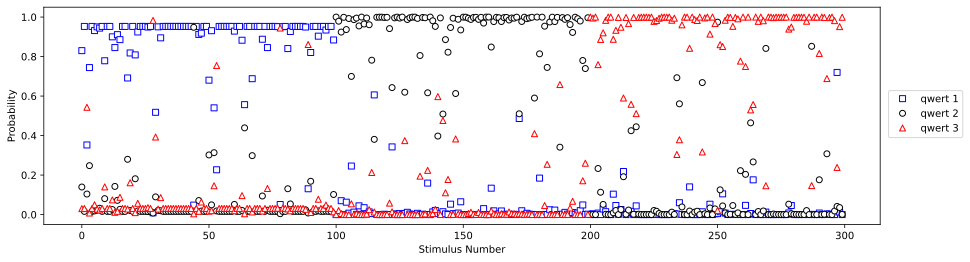

In [52]:
fig = plt.figure(figsize=(15, 4))

color_shape = ['bs', 'ko', 'r^']
for i in range(3):
    plt.plot(y_hat[:, i].detach(), color_shape[i], markerfacecolor='w')

plt.xlabel('Stimulus Number')
plt.ylabel('Probability')
plt.legend(['qwert 1', 'qwert 2', 'qwert 3'], loc=(1.01, .4))
plt.show()

# Additional explorations
1) Does the model always do well? Re-run the entire notebook multiple times and see if it always reaches high accuracy
   (e.g., >90%). What do you think would be ways to improve the performance stability of the model?

2) You'll learn in the section "Metaparameters" that CrossEntropyLoss computes log-softmax internally. Does that mean 
   that the Softmax() layer in the model needs to be there? Does it hurt or help? If you remove that final layer, what
   would change and what would be the same in the rest of the notebook?
   (Note about this problem: If it feels too advanced, then revisit this problem after the "Metaparameters" section.)